🚀 Starting Telecom Big Data Analysis...
=== DATASET OVERVIEW ===
📊 Total Records: 100
📋 Columns: ['Customer ID', 'Call Duration', 'Data Usage', 'Location', 'Service Plan', 'Complaints', 'Churn Indicator']
+-----------+-------------+----------+----------+------------+----------+---------------+
|Customer ID|Call Duration|Data Usage|  Location|Service Plan|Complaints|Churn Indicator|
+-----------+-------------+----------+----------+------------+----------+---------------+
|   CUST1000|          102|     44.74|Biratnagar|       Basic|         3|             No|
|   CUST1001|          435|     29.89| Kathmandu|     Premium|         1|             No|
|   CUST1002|          348|     46.09|   Pokhara|     Premium|         5|             No|
|   CUST1003|          270|      4.42|   Pokhara|    Standard|         3|            Yes|
|   CUST1004|          106|       9.8|Biratnagar|       Basic|         2|            Yes|
|   CUST1005|           71|      2.26|Biratnagar|    Standard|         2|  

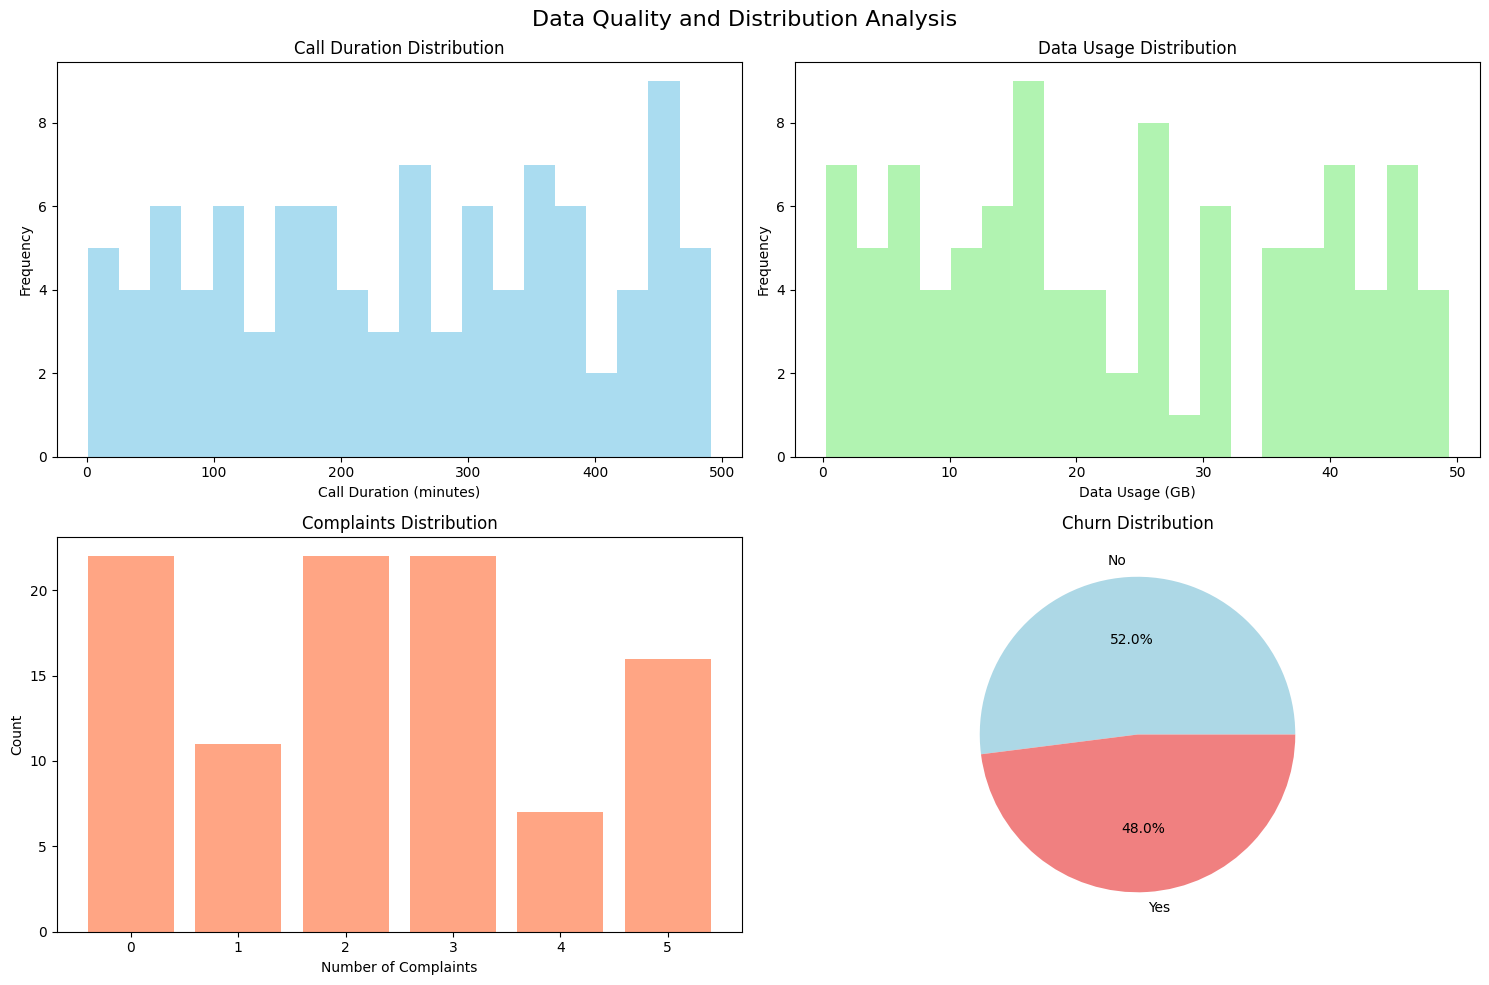


=== FEATURE ENGINEERING ===
✅ Engineered Features Sample:
+-----------+---------------+----------------+---------------+-------------+
|Customer ID|Usage_Intensity|Data_Consumption|Complaint_Level|Churn_Numeric|
+-----------+---------------+----------------+---------------+-------------+
|   CUST1000|            Low|           Heavy|         Medium|            0|
|   CUST1001|           High|        Moderate|            Low|            0|
|   CUST1002|           High|           Heavy|           High|            0|
|   CUST1003|         Medium|           Light|         Medium|            1|
|   CUST1004|            Low|           Light|         Medium|            1|
|   CUST1005|            Low|           Light|         Medium|            1|
|   CUST1006|         Medium|        Moderate|            Low|            1|
|   CUST1007|            Low|        Moderate|           High|            1|
|   CUST1008|            Low|           Light|           High|            1|
|   CUST1009|    

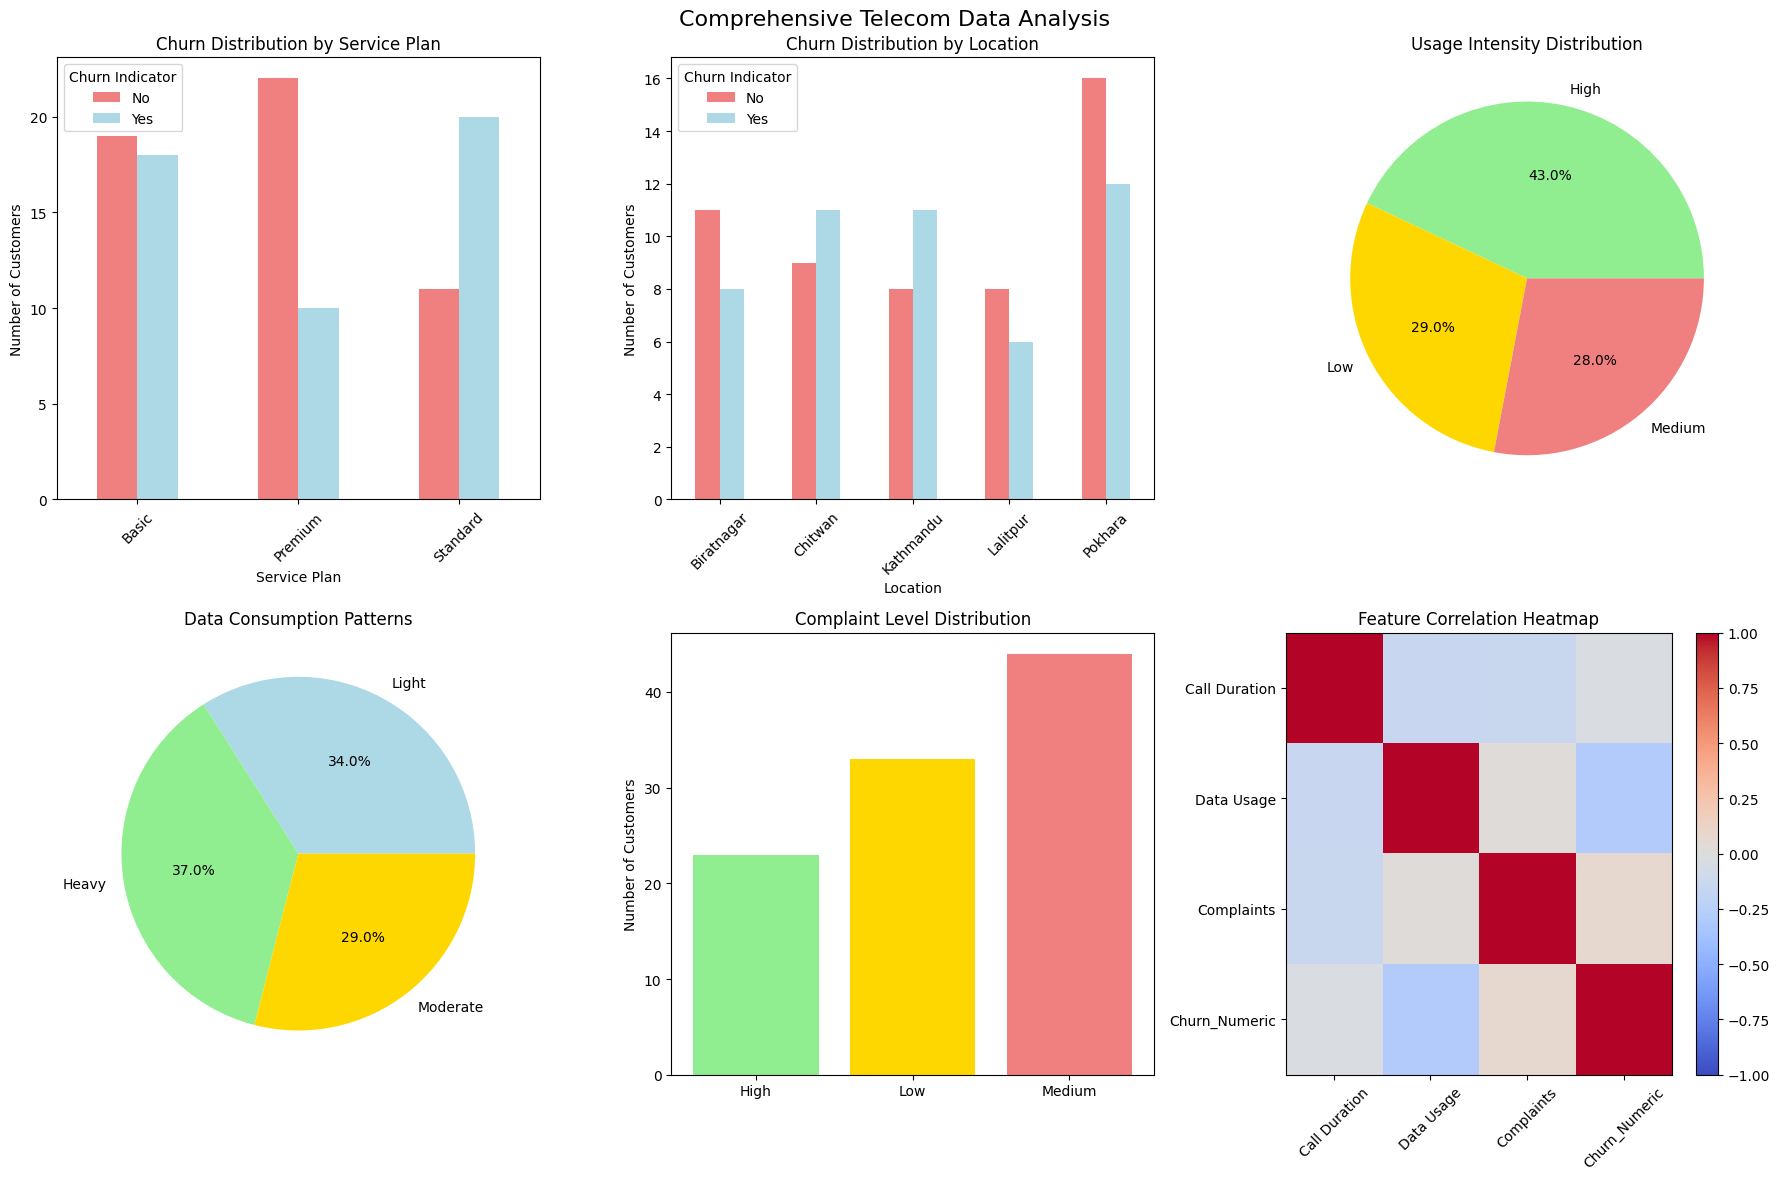


=== SPARK OPERATIONS COMPARISON ===
📊 RDD Results - Average Call Duration by Service Plan:
   Basic: 256.27 minutes
   Premium: 258.44 minutes
   Standard: 242.52 minutes

📊 DataFrame Results - Average Call Duration by Service Plan:
   Premium: 258.44 minutes
   Basic: 256.27 minutes
   Standard: 242.52 minutes

📊 Spark SQL Results - Average Call Duration by Service Plan:
   Premium: 258.44 minutes
   Basic: 256.27 minutes
   Standard: 242.52 minutes

⏱️ Execution Times:
   RDD: 2.6877 seconds
   DataFrame: 0.8693 seconds
   Spark SQL: 0.5678 seconds


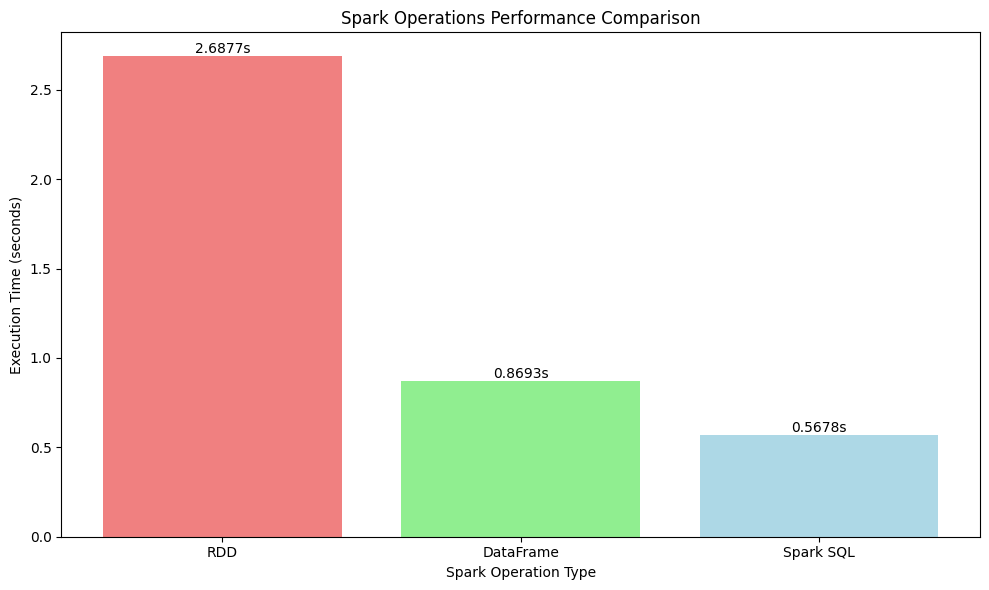


=== CHURN PREDICTION MODEL ===
🤖 Training Churn Prediction Model...
✅ Model AUC: 0.5286

📈 Prediction Results Sample:
+-----------+-------------+----------+--------------------+
|Customer ID|Churn_Numeric|prediction|         probability|
+-----------+-------------+----------+--------------------+
|   CUST1002|            0|       0.0|[0.58598024380944...|
|   CUST1006|            1|       0.0|[0.55287055080265...|
|   CUST1008|            1|       1.0|[0.20512511769938...|
|   CUST1013|            1|       0.0|[0.61225508071513...|
|   CUST1019|            1|       1.0|[0.23279055424281...|
|   CUST1023|            0|       0.0|[0.69552787092245...|
|   CUST1029|            0|       0.0|[0.63123784840186...|
|   CUST1035|            1|       0.0|[0.79670348857003...|
|   CUST1045|            0|       1.0|[0.39644857061329...|
|   CUST1046|            1|       1.0|[0.42098273018429...|
+-----------+-------------+----------+--------------------+
only showing top 10 rows



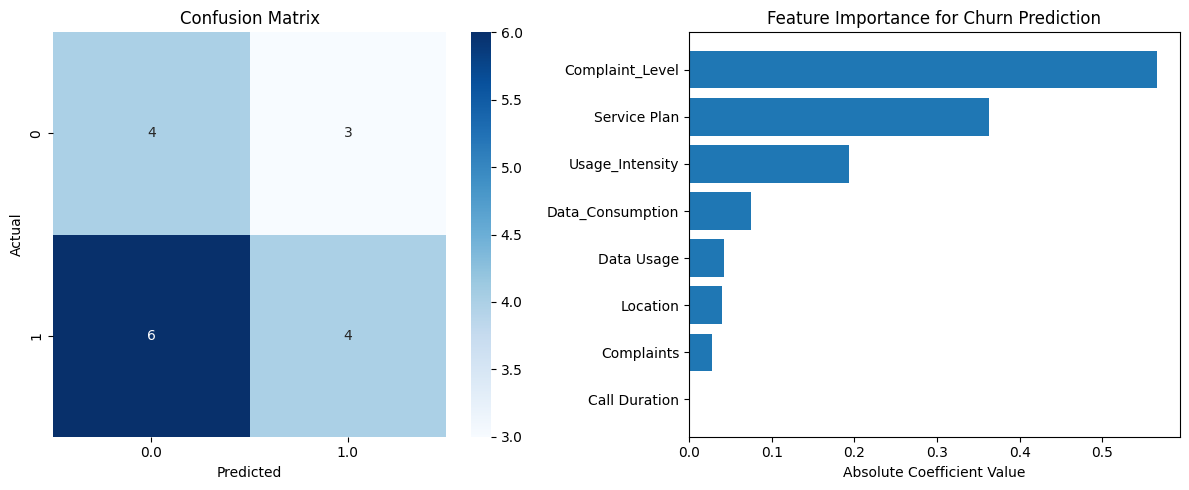

In [ ]:
# telecom_analysis_jupyter.py
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("TelecomAnalytics") \
    .config("spark.sql.adaptive.enabled", "true") \
    .getOrCreate()

print("🚀 Starting Telecom Big Data Analysis...")

# Load the dataset
df = spark.read.csv("synthetic_customer_data.csv", header=True, inferSchema=True)

print("=== DATASET OVERVIEW ===")
print(f"📊 Total Records: {df.count()}")
print(f"📋 Columns: {df.columns}")
df.show(10)
df.printSchema()

# Data Cleaning and Preprocessing
print("\n=== DATA CLEANING ===")

# Check for null values
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
print("❓ Null values in each column:")
null_counts.show()

# Check for duplicates
duplicate_count = df.count() - df.distinct().count()
print(f"🔍 Duplicate records: {duplicate_count}")

# Data Quality Analysis
print("\n=== DATA QUALITY ANALYSIS ===")

# Create a visualization for data quality
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Quality and Distribution Analysis', fontsize=16)

# 1. Call Duration Distribution
call_duration_pd = df.select("Call Duration").toPandas()
axes[0, 0].hist(call_duration_pd['Call Duration'], bins=20, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Call Duration Distribution')
axes[0, 0].set_xlabel('Call Duration (minutes)')
axes[0, 0].set_ylabel('Frequency')

# 2. Data Usage Distribution
data_usage_pd = df.select("Data Usage").toPandas()
axes[0, 1].hist(data_usage_pd['Data Usage'], bins=20, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Data Usage Distribution')
axes[0, 1].set_xlabel('Data Usage (GB)')
axes[0, 1].set_ylabel('Frequency')

# 3. Complaints Distribution
complaints_pd = df.select("Complaints").toPandas()
complaints_count = complaints_pd['Complaints'].value_counts().sort_index()
axes[1, 0].bar(complaints_count.index, complaints_count.values, color='coral', alpha=0.7)
axes[1, 0].set_title('Complaints Distribution')
axes[1, 0].set_xlabel('Number of Complaints')
axes[1, 0].set_ylabel('Count')

# 4. Churn Distribution
churn_pd = df.select("Churn Indicator").toPandas()
churn_count = churn_pd['Churn Indicator'].value_counts()
axes[1, 1].pie(churn_count.values, labels=churn_count.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1, 1].set_title('Churn Distribution')

plt.tight_layout()
plt.show()

# Feature Engineering
print("\n=== FEATURE ENGINEERING ===")

# Create new features
df_engineered = df.withColumn(
    "Usage_Intensity",
    when(col("Call Duration") > 300, "High")
    .when(col("Call Duration") > 150, "Medium")
    .otherwise("Low")
).withColumn(
    "Data_Consumption",
    when(col("Data Usage") > 30, "Heavy")
    .when(col("Data Usage") > 15, "Moderate")
    .otherwise("Light")
).withColumn(
    "Complaint_Level",
    when(col("Complaints") >= 4, "High")
    .when(col("Complaints") >= 2, "Medium")
    .otherwise("Low")
).withColumn(
    "Churn_Numeric",
    when(col("Churn Indicator") == "Yes", 1).otherwise(0)
)

print("✅ Engineered Features Sample:")
df_engineered.select("Customer ID", "Usage_Intensity", "Data_Consumption",
                    "Complaint_Level", "Churn_Numeric").show(10)

# Exploratory Data Analysis with Visualizations
print("\n=== EXPLORATORY DATA ANALYSIS ===")

# Create comprehensive EDA visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Telecom Data Analysis', fontsize=16)

# 1. Churn by Service Plan
churn_by_plan_pd = df_engineered.groupBy("Service Plan", "Churn Indicator").count().toPandas()
pivot_churn = churn_by_plan_pd.pivot(index='Service Plan', columns='Churn Indicator', values='count')
pivot_churn.plot(kind='bar', ax=axes[0, 0], color=['lightcoral', 'lightblue'])
axes[0, 0].set_title('Churn Distribution by Service Plan')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Churn by Location
churn_by_location_pd = df_engineered.groupBy("Location", "Churn Indicator").count().toPandas()
pivot_location = churn_by_location_pd.pivot(index='Location', columns='Churn Indicator', values='count')
pivot_location.plot(kind='bar', ax=axes[0, 1], color=['lightcoral', 'lightblue'])
axes[0, 1].set_title('Churn Distribution by Location')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Usage Intensity Distribution
usage_intensity_pd = df_engineered.groupBy("Usage_Intensity").count().toPandas()
axes[0, 2].pie(usage_intensity_pd['count'], labels=usage_intensity_pd['Usage_Intensity'],
               autopct='%1.1f%%', colors=['lightgreen', 'gold', 'lightcoral'])
axes[0, 2].set_title('Usage Intensity Distribution')

# 4. Data Consumption Patterns
data_consumption_pd = df_engineered.groupBy("Data_Consumption").count().toPandas()
axes[1, 0].pie(data_consumption_pd['count'], labels=data_consumption_pd['Data_Consumption'],
               autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'gold'])
axes[1, 0].set_title('Data Consumption Patterns')

# 5. Complaint Levels
complaint_level_pd = df_engineered.groupBy("Complaint_Level").count().toPandas()
axes[1, 1].bar(complaint_level_pd['Complaint_Level'], complaint_level_pd['count'],
               color=['lightgreen', 'gold', 'lightcoral'])
axes[1, 1].set_title('Complaint Level Distribution')
axes[1, 1].set_ylabel('Number of Customers')

# 6. Correlation Heatmap (convert to pandas for correlation)
numeric_data_pd = df_engineered.select("Call Duration", "Data Usage", "Complaints", "Churn_Numeric").toPandas()
correlation_matrix = numeric_data_pd.corr()
im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[1, 2].set_yticklabels(correlation_matrix.columns)
axes[1, 2].set_title('Feature Correlation Heatmap')

# Add colorbar
plt.colorbar(im, ax=axes[1, 2])

plt.tight_layout()
plt.show()

# SPARK OPERATIONS COMPARISON
print("\n=== SPARK OPERATIONS COMPARISON ===")

import time

def rdd_operations():
    start_time = time.time()
    rdd_data = df.rdd.map(lambda row: (row['Service Plan'], (row['Call Duration'], 1)))
    avg_duration_rdd = rdd_data.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])) \
                              .mapValues(lambda x: x[0] / x[1])
    result_rdd = avg_duration_rdd.collect()
    return time.time() - start_time, result_rdd

def dataframe_operations():
    start_time = time.time()
    avg_duration_df = df.groupBy("Service Plan").agg(avg("Call Duration").alias("Avg_Call_Duration"))
    result_df = avg_duration_df.collect()
    return time.time() - start_time, result_df

def spark_sql_operations():
    start_time = time.time()
    df.createOrReplaceTempView("telecom_data")
    avg_duration_sql = spark.sql("""
        SELECT `Service Plan`, AVG(`Call Duration`) as Avg_Call_Duration
        FROM telecom_data
        GROUP BY `Service Plan`
    """)
    result_sql = avg_duration_sql.collect()
    return time.time() - start_time, result_sql

# Run all operations
rdd_time, rdd_results = rdd_operations()
df_time, df_results = dataframe_operations()
sql_time, sql_results = spark_sql_operations()

# Display results
print("📊 RDD Results - Average Call Duration by Service Plan:")
for plan, avg in rdd_results:
    print(f"   {plan}: {avg:.2f} minutes")

print("\n📊 DataFrame Results - Average Call Duration by Service Plan:")
for row in df_results:
    print(f"   {row['Service Plan']}: {row['Avg_Call_Duration']:.2f} minutes")

print("\n📊 Spark SQL Results - Average Call Duration by Service Plan:")
for row in sql_results:
    print(f"   {row['Service Plan']}: {row['Avg_Call_Duration']:.2f} minutes")

# Performance Comparison Visualization
print(f"\n⏱️ Execution Times:")
print(f"   RDD: {rdd_time:.4f} seconds")
print(f"   DataFrame: {df_time:.4f} seconds")
print(f"   Spark SQL: {sql_time:.4f} seconds")

# Create performance comparison chart
methods = ['RDD', 'DataFrame', 'Spark SQL']
times = [rdd_time, df_time, sql_time]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, times, color=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Spark Operations Performance Comparison')
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Spark Operation Type')

# Add value labels on bars
for bar, time_val in zip(bars, times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{time_val:.4f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# CHURN PREDICTION MODEL
print("\n=== CHURN PREDICTION MODEL ===")

# Prepare features for machine learning
indexers = [
    StringIndexer(inputCol=col, outputCol=col+"_index")
    for col in ["Location", "Service Plan", "Usage_Intensity", "Data_Consumption", "Complaint_Level"]
]

assembler = VectorAssembler(
    inputCols=["Call Duration", "Data Usage", "Complaints",
               "Location_index", "Service Plan_index",
               "Usage_Intensity_index", "Data_Consumption_index", "Complaint_Level_index"],
    outputCol="features"
)

lr = LogisticRegression(featuresCol="features", labelCol="Churn_Numeric")
pipeline = Pipeline(stages=indexers + [assembler, lr])

# Split data
train_data, test_data = df_engineered.randomSplit([0.8, 0.2], seed=42)

print("🤖 Training Churn Prediction Model...")
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="Churn_Numeric")
auc = evaluator.evaluate(predictions)

print(f"✅ Model AUC: {auc:.4f}")

# Show prediction results
print("\n📈 Prediction Results Sample:")
predictions.select("Customer ID", "Churn_Numeric", "prediction", "probability").show(10)

# Model Performance Visualization
plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
actual_vs_predicted = predictions.select("Churn_Numeric", "prediction").toPandas()
confusion_matrix = pd.crosstab(actual_vs_predicted['Churn_Numeric'],
                              actual_vs_predicted['prediction'],
                              rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

# Feature Importance (for logistic regression)
plt.subplot(1, 2, 2)
lr_model = model.stages[-1]
if hasattr(lr_model, 'coefficients'):
    feature_names = ["Call Duration", "Data Usage", "Complaints", "Location",
                    "Service Plan", "Usage_Intensity", "Data_Consumption", "Complaint_Level"]
    coefficients = lr_model.coefficients.toArray()
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(coefficients)
    }).sort_values('Importance', ascending=True)

    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.title('Feature Importance for Churn Prediction')
    plt.xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()



Perform the following analyses using PySpark:

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("TelecomAnalytics") \
    .config("spark.sql.adaptive.enabled", "true") \
    .getOrCreate()

# Load the data
df = spark.read.option("header", "true").option("inferSchema", "true").csv("synthetic_customer_data.csv")

print("Dataset Overview:")
df.show(10)
print(f"Total records: {df.count()}")

# 1. CUSTOMER CHURN PREDICTION (CLASSIFICATION)
print("\n" + "="*50)
print("1. CUSTOMER CHURN PREDICTION ANALYSIS")
print("="*50)

# Data preparation for churn prediction
df_churn = df.withColumn("churn_numeric", when(col("Churn Indicator") == "Yes", 1).otherwise(0))

# Feature engineering
categorical_cols = ["Location", "Service Plan"]
numerical_cols = ["Call Duration", "Data Usage", "Complaints"]

# String Indexers for categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep")
           for col in categorical_cols]

# One-Hot Encoding
encoder = OneHotEncoder(inputCols=[col+"_index" for col in categorical_cols],
                       outputCols=[col+"_encoded" for col in categorical_cols])

# Feature assembler
feature_cols = numerical_cols + [col+"_encoded" for col in categorical_cols]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Split data
train_data, test_data = df_churn.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="churn_numeric",
                       maxIter=10, regParam=0.01)

# Create pipeline
pipeline_lr = Pipeline(stages=indexers + [encoder, assembler, lr])

# Train model
model_lr = pipeline_lr.fit(train_data)

# Make predictions
predictions_lr = model_lr.transform(test_data)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="churn_numeric",
                                         rawPredictionCol="rawPrediction",
                                         metricName="areaUnderROC")
auc_lr = evaluator.evaluate(predictions_lr)

print(f"Logistic Regression AUC: {auc_lr:.4f}")

# Feature importance analysis
print("\nChurn Rate by Service Plan:")
df_churn.groupBy("Service Plan", "Churn Indicator").count() \
    .groupBy("Service Plan").pivot("Churn Indicator").sum("count") \
    .withColumn("Churn Rate", col("Yes") / (col("Yes") + col("No"))) \
    .show()

print("\nChurn Rate by Location:")
df_churn.groupBy("Location", "Churn Indicator").count() \
    .groupBy("Location").pivot("Churn Indicator").sum("count") \
    .withColumn("Churn Rate", col("Yes") / (col("Yes") + col("No"))) \
    .show()

# 2. NETWORK CONGESTION ANALYSIS (RESOURCE UTILIZATION)
print("\n" + "="*50)
print("2. NETWORK CONGESTION ANALYSIS")
print("="*50)

# Define thresholds for high utilization
high_call_threshold = df.approxQuantile("Call Duration", [0.75], 0.01)[0]
high_data_threshold = df.approxQuantile("Data Usage", [0.75], 0.01)[0]

print(f"High Call Duration Threshold (75th percentile): {high_call_threshold:.2f} minutes")
print(f"High Data Usage Threshold (75th percentile): {high_data_threshold:.2f} GB")

# Network congestion analysis by location
congestion_analysis = df.groupBy("Location").agg(
    avg("Call Duration").alias("Avg_Call_Duration"),
    avg("Data Usage").alias("Avg_Data_Usage"),
    count("*").alias("Total_Customers"),
    sum(when(col("Call Duration") > high_call_threshold, 1).otherwise(0)).alias("High_Call_Users"),
    sum(when(col("Data Usage") > high_data_threshold, 1).otherwise(0)).alias("High_Data_Users")
).withColumn("Call_Congestion_Rate", col("High_Call_Users") / col("Total_Customers")) \
 .withColumn("Data_Congestion_Rate", col("High_Data_Users") / col("Total_Customers")) \
 .withColumn("Overall_Congestion_Score",
            (col("Call_Congestion_Rate") + col("Data_Congestion_Rate")) / 2) \
 .orderBy(desc("Overall_Congestion_Score"))

print("\nNetwork Congestion Analysis by Location:")
congestion_analysis.show()

# Service plan utilization
print("\nService Plan Utilization Patterns:")
plan_utilization = df.groupBy("Service Plan").agg(
    avg("Call Duration").alias("Avg_Call_Duration"),
    avg("Data Usage").alias("Avg_Data_Usage"),
    stddev("Call Duration").alias("Std_Call_Duration"),
    stddev("Data Usage").alias("Std_Data_Usage"),
    count("*").alias("Subscriber_Count")
)
plan_utilization.show()

# 3. SERVICE PLAN PROFITABILITY ANALYSIS
print("\n" + "="*50)
print("3. SERVICE PLAN PROFITABILITY ANALYSIS")
print("="*50)

# Define revenue assumptions (hypothetical pricing)
revenue_mapping = {
    "Basic": 10.0,      # $10 per month
    "Standard": 25.0,   # $25 per month
    "Premium": 50.0     # $50 per month
}

# Define cost assumptions (hypothetical costs based on usage)
def calculate_cost(data_usage, call_duration, plan):
    base_cost = 2.0  # Fixed infrastructure cost
    data_cost = data_usage * 0.1  # $0.1 per GB
    call_cost = call_duration * 0.01  # $0.01 per minute

    # Premium plans might have higher support costs
    support_cost = 1.0 if plan == "Basic" else 2.0 if plan == "Standard" else 5.0

    return base_cost + data_cost + call_cost + support_cost

# Register UDF for cost calculation
from pyspark.sql.functions import udf
calculate_cost_udf = udf(calculate_cost, DoubleType())

# Calculate profitability
profitability_df = df.withColumn("Monthly_Revenue",
    when(col("Service Plan") == "Basic", revenue_mapping["Basic"])
    .when(col("Service Plan") == "Standard", revenue_mapping["Standard"])
    .when(col("Service Plan") == "Premium", revenue_mapping["Premium"])
    .otherwise(0.0)) \
.withColumn("Monthly_Cost", calculate_cost_udf(col("Data Usage"), col("Call Duration"), col("Service Plan"))) \
.withColumn("Monthly_Profit", col("Monthly_Revenue") - col("Monthly_Cost")) \
.withColumn("Profit_Margin", col("Monthly_Profit") / col("Monthly_Revenue"))

# Service plan profitability summary
profitability_summary = profitability_df.groupBy("Service Plan").agg(
    count("*").alias("Subscriber_Count"),
    avg("Monthly_Revenue").alias("Avg_Revenue"),
    avg("Monthly_Cost").alias("Avg_Cost"),
    avg("Monthly_Profit").alias("Avg_Profit"),
    avg("Profit_Margin").alias("Avg_Profit_Margin"),
    sum("Monthly_Profit").alias("Total_Profit")
).orderBy(desc("Total_Profit"))

print("Service Plan Profitability Summary:")
profitability_summary.show()

# Churn impact on profitability
print("\nChurn Impact on Profitability:")
churn_profitability = profitability_df.groupBy("Churn Indicator", "Service Plan").agg(
    count("*").alias("Customer_Count"),
    avg("Monthly_Profit").alias("Avg_Profit"),
    sum("Monthly_Profit").alias("Total_Profit")
).orderBy("Service Plan", "Churn Indicator")
churn_profitability.show()

# Location-based profitability
print("\nProfitability by Location:")
location_profitability = profitability_df.groupBy("Location").agg(
    count("*").alias("Customer_Count"),
    avg("Monthly_Profit").alias("Avg_Profit"),
    sum("Monthly_Profit").alias("Total_Profit"),
    avg("Profit_Margin").alias("Avg_Profit_Margin")
).orderBy(desc("Total_Profit"))
location_profitability.show()

# Additional insights
print("\n" + "="*50)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*50)

# Churn insights
total_customers = df.count()
churned_customers = df.filter(col("Churn Indicator") == "Yes").count()
churn_rate = churned_customers / total_customers

print(f"Overall Churn Rate: {churn_rate:.2%}")
print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")

# High-value customers at risk
high_value_at_risk = profitability_df.filter(
    (col("Churn Indicator") == "Yes") &
    (col("Monthly_Profit") > profitability_df.approxQuantile("Monthly_Profit", [0.75], 0.01)[0])
).count()

print(f"High-value customers at risk of churn: {high_value_at_risk}")

# Most congested locations
most_congested = congestion_analysis.first()
print(f"Most congested location: {most_congested['Location']} "
      f"(Congestion Score: {most_congested['Overall_Congestion_Score']:.2%})")

# Most profitable service plan
most_profitable = profitability_summary.first()
print(f"Most profitable service plan: {most_profitable['Service Plan']} "
      f"(Total Profit: ${most_profitable['Total_Profit']:.2f})")

# Stop Spark session
spark.stop()

Dataset Overview:
+-----------+-------------+----------+----------+------------+----------+---------------+
|Customer ID|Call Duration|Data Usage|  Location|Service Plan|Complaints|Churn Indicator|
+-----------+-------------+----------+----------+------------+----------+---------------+
|   CUST1000|          102|     44.74|Biratnagar|       Basic|         3|             No|
|   CUST1001|          435|     29.89| Kathmandu|     Premium|         1|             No|
|   CUST1002|          348|     46.09|   Pokhara|     Premium|         5|             No|
|   CUST1003|          270|      4.42|   Pokhara|    Standard|         3|            Yes|
|   CUST1004|          106|       9.8|Biratnagar|       Basic|         2|            Yes|
|   CUST1005|           71|      2.26|Biratnagar|    Standard|         2|            Yes|
|   CUST1006|          188|     16.27|   Chitwan|       Basic|         0|            Yes|
|   CUST1007|           20|     19.43| Kathmandu|    Standard|         5|         

Perform the following analyses using PySpark with Visualization

Dataset Overview:
+-----------+-------------+----------+----------+------------+----------+---------------+
|Customer ID|Call Duration|Data Usage|  Location|Service Plan|Complaints|Churn Indicator|
+-----------+-------------+----------+----------+------------+----------+---------------+
|   CUST1000|          102|     44.74|Biratnagar|       Basic|         3|             No|
|   CUST1001|          435|     29.89| Kathmandu|     Premium|         1|             No|
|   CUST1002|          348|     46.09|   Pokhara|     Premium|         5|             No|
|   CUST1003|          270|      4.42|   Pokhara|    Standard|         3|            Yes|
|   CUST1004|          106|       9.8|Biratnagar|       Basic|         2|            Yes|
|   CUST1005|           71|      2.26|Biratnagar|    Standard|         2|            Yes|
|   CUST1006|          188|     16.27|   Chitwan|       Basic|         0|            Yes|
|   CUST1007|           20|     19.43| Kathmandu|    Standard|         5|         

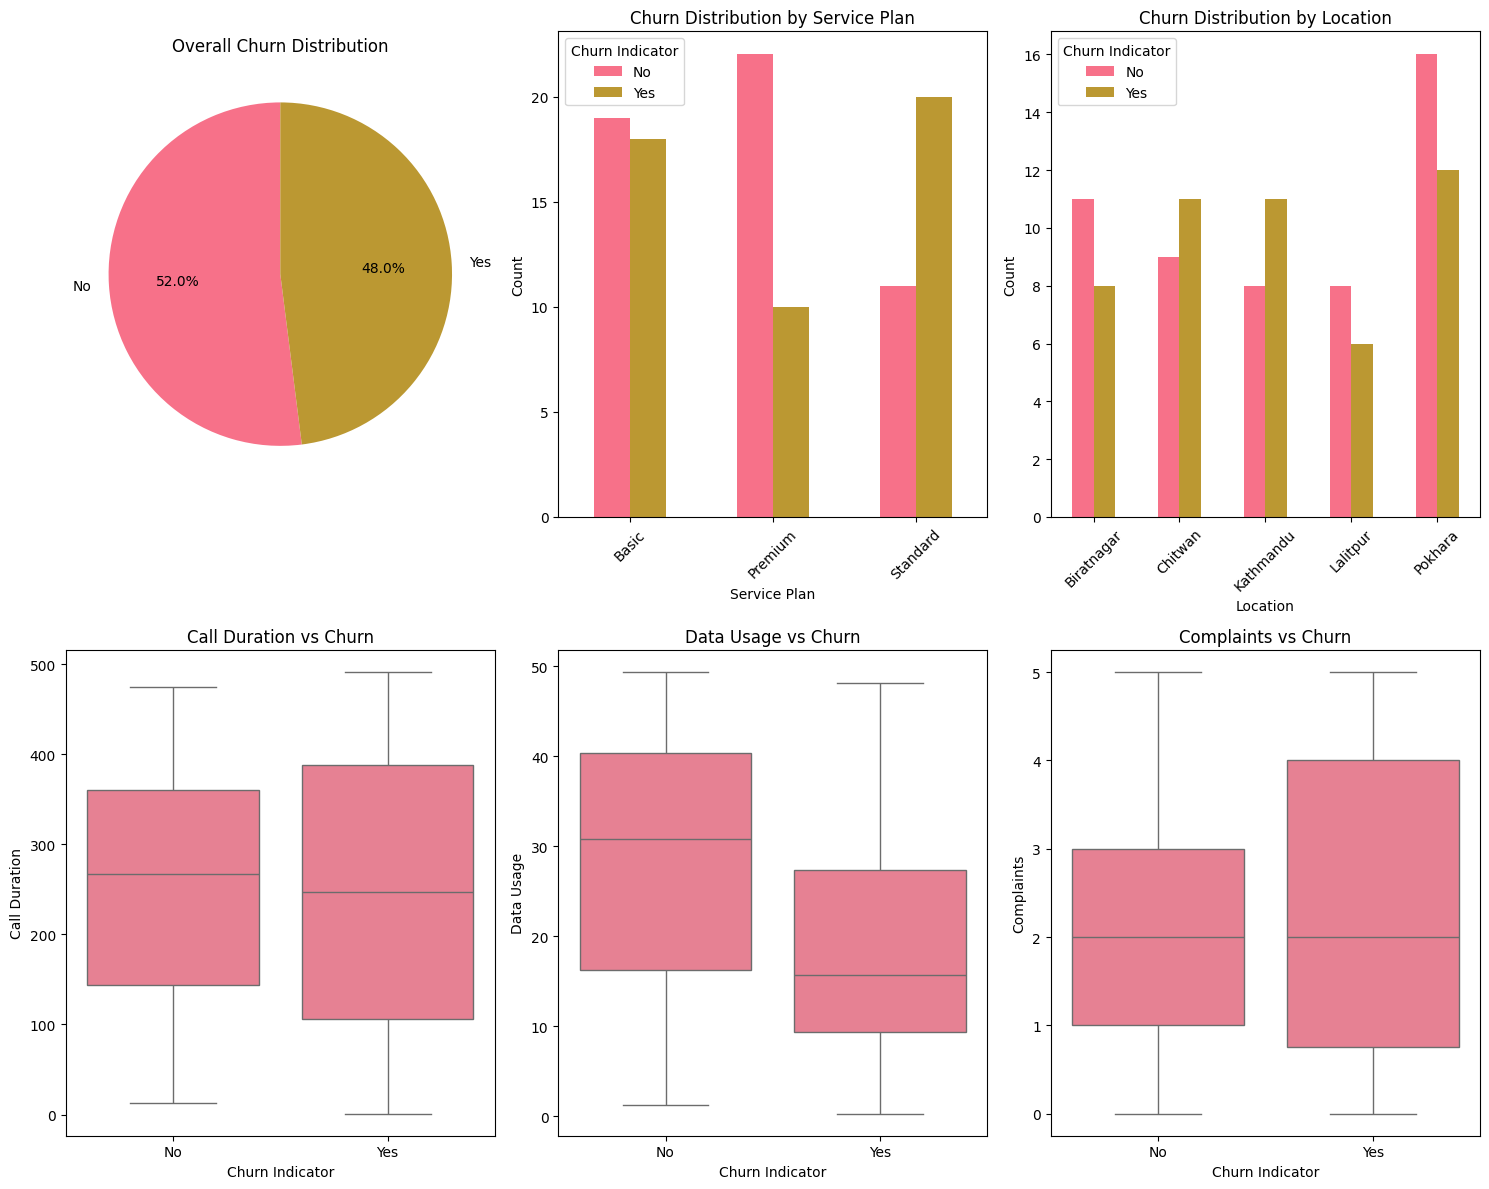

Logistic Regression AUC: 0.6429


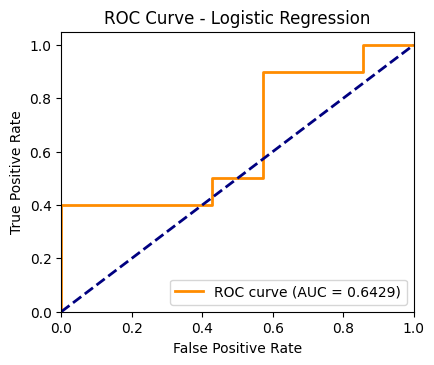

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("TelecomAnalytics") \
    .config("spark.sql.adaptive.enabled", "true") \
    .getOrCreate()

# Load the data
df = spark.read.option("header", "true").option("inferSchema", "true").csv("synthetic_customer_data.csv")

print("Dataset Overview:")
df.show(10)
print(f"Total records: {df.count()}")

# Convert to pandas for visualization
df_pandas = df.toPandas()

# 1. CUSTOMER CHURN PREDICTION (CLASSIFICATION)
print("\n" + "="*50)
print("1. CUSTOMER CHURN PREDICTION ANALYSIS")
print("="*50)

# Data preparation for churn prediction
df_churn = df.withColumn("churn_numeric", when(col("Churn Indicator") == "Yes", 1).otherwise(0))
df_churn_pandas = df_churn.toPandas()

# Visualization 1: Churn Distribution
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
churn_counts = df_churn_pandas['Churn Indicator'].value_counts()
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Churn Distribution')

# Visualization 2: Churn by Service Plan
plt.subplot(2, 3, 2)
churn_by_plan = pd.crosstab(df_churn_pandas['Service Plan'], df_churn_pandas['Churn Indicator'])
churn_by_plan.plot(kind='bar', ax=plt.gca())
plt.title('Churn Distribution by Service Plan')
plt.xlabel('Service Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Visualization 3: Churn by Location
plt.subplot(2, 3, 3)
churn_by_location = pd.crosstab(df_churn_pandas['Location'], df_churn_pandas['Churn Indicator'])
churn_by_location.plot(kind='bar', ax=plt.gca())
plt.title('Churn Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Visualization 4: Numerical Features vs Churn
plt.subplot(2, 3, 4)
sns.boxplot(data=df_churn_pandas, x='Churn Indicator', y='Call Duration')
plt.title('Call Duration vs Churn')

plt.subplot(2, 3, 5)
sns.boxplot(data=df_churn_pandas, x='Churn Indicator', y='Data Usage')
plt.title('Data Usage vs Churn')

plt.subplot(2, 3, 6)
sns.boxplot(data=df_churn_pandas, x='Churn Indicator', y='Complaints')
plt.title('Complaints vs Churn')

plt.tight_layout()
plt.show()

# Feature engineering and model training (same as before)
categorical_cols = ["Location", "Service Plan"]
numerical_cols = ["Call Duration", "Data Usage", "Complaints"]

indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep")
           for col in categorical_cols]

encoder = OneHotEncoder(inputCols=[col+"_index" for col in categorical_cols],
                       outputCols=[col+"_encoded" for col in categorical_cols])

feature_cols = numerical_cols + [col+"_encoded" for col in categorical_cols]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

train_data, test_data = df_churn.randomSplit([0.8, 0.2], seed=42)

lr = LogisticRegression(featuresCol="features", labelCol="churn_numeric",
                       maxIter=10, regParam=0.01)

pipeline_lr = Pipeline(stages=indexers + [encoder, assembler, lr])
model_lr = pipeline_lr.fit(train_data)
predictions_lr = model_lr.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol="churn_numeric",
                                         rawPredictionCol="rawPrediction",
                                         metricName="areaUnderROC")
auc_lr = evaluator.evaluate(predictions_lr)

print(f"Logistic Regression AUC: {auc_lr:.4f}")

# Visualization: ROC Curve
plt.figure(figsize=(10, 8))

# Convert predictions to pandas for visualization
predictions_pd = predictions_lr.select("churn_numeric", "probability").toPandas()
predictions_pd['probability_1'] = predictions_pd['probability'].apply(lambda x: float(x[1]))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(predictions_pd['churn_numeric'], predictions_pd['probability_1'])
roc_auc = auc(fpr, tpr)

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

In [ ]:
# 2. NETWORK CONGESTION ANALYSIS (RESOURCE UTILIZATION)
print("\n" + "="*50)
print("2. NETWORK CONGESTION ANALYSIS")
print("="*50)


2. NETWORK CONGESTION ANALYSIS


In [ ]:
# Define thresholds for high utilization
high_call_threshold = df.approxQuantile("Call Duration", [0.75], 0.01)[0]
high_data_threshold = df.approxQuantile("Data Usage", [0.75], 0.01)[0]

print(f"High Call Duration Threshold (75th percentile): {high_call_threshold:.2f} minutes")
print(f"High Data Usage Threshold (75th percentile): {high_data_threshold:.2f} GB")

High Call Duration Threshold (75th percentile): 366.00 minutes
High Data Usage Threshold (75th percentile): 37.78 GB


In [ ]:
# Network congestion analysis by location
congestion_analysis = df.groupBy("Location").agg(
    avg("Call Duration").alias("Avg_Call_Duration"),
    avg("Data Usage").alias("Avg_Data_Usage"),
    count("*").alias("Total_Customers"),
    sum(when(col("Call Duration") > high_call_threshold, 1).otherwise(0)).alias("High_Call_Users"),
    sum(when(col("Data Usage") > high_data_threshold, 1).otherwise(0)).alias("High_Data_Users")
).withColumn("Call_Congestion_Rate", col("High_Call_Users") / col("Total_Customers")) \
 .withColumn("Data_Congestion_Rate", col("High_Data_Users") / col("Total_Customers")) \
 .withColumn("Overall_Congestion_Score",
            (col("Call_Congestion_Rate") + col("Data_Congestion_Rate")) / 2) \
 .orderBy(desc("Overall_Congestion_Score"))

congestion_pd = congestion_analysis.toPandas()

([<matplotlib.axis.XTick at 0x7f090dafb200>,
 [Text(0, 0, 'Lalitpur'),
  Text(1, 0, 'Kathmandu'),
  Text(2, 0, 'Pokhara'),
  Text(3, 0, 'Chitwan'),
  Text(4, 0, 'Biratnagar')])

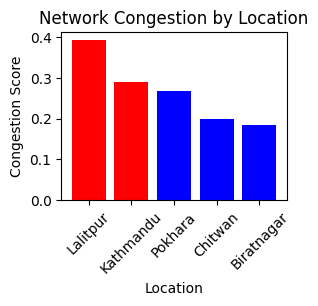

In [ ]:
# Visualization: Network Congestion Analysis
plt.subplot(2, 2, 2)
locations = congestion_pd['Location']
y_pos = np.arange(len(locations))
congestion_scores = congestion_pd['Overall_Congestion_Score']

plt.bar(y_pos, congestion_scores, color=['red' if x > congestion_scores.median() else 'blue' for x in congestion_scores])
plt.xlabel('Location')
plt.ylabel('Congestion Score')
plt.title('Network Congestion by Location')
plt.xticks(y_pos, locations, rotation=45)

TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

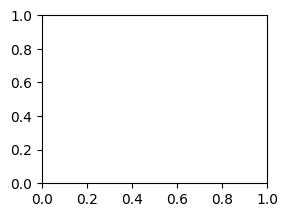

In [ ]:
# Service plan utilization
plt.subplot(2, 2, 3)
plan_utilization = df.groupBy("Service Plan").agg(
    avg("Call Duration").alias("Avg_Call_Duration"),
    avg("Data Usage").alias("Avg_Data_Usage"),
    count("*").alias("Subscriber_Count")
).toPandas()

x = np.arange(len(plan_utilization))
width = 0.35

fig, ax = plt.subplots(2, 2, 3)
rects1 = ax.bar(x - width/2, plan_utilization['Avg_Call_Duration'], width, label='Avg Call Duration')
rects2 = ax.bar(x + width/2, plan_utilization['Avg_Data_Usage'], width, label='Avg Data Usage')

ax.set_xlabel('Service Plan')
ax.set_ylabel('Usage')
ax.set_title('Service Plan Utilization Patterns')
ax.set_xticks(x)
ax.set_xticklabels(plan_utilization['Service Plan'])
ax.legend()
plt.xticks(rotation=45)

In [ ]:
# 3. SERVICE PLAN PROFITABILITY ANALYSIS
print("\n" + "="*50)
print("3. SERVICE PLAN PROFITABILITY ANALYSIS")
print("="*50)


3. SERVICE PLAN PROFITABILITY ANALYSIS


In [ ]:
# Define revenue assumptions
revenue_mapping = {
    "Basic": 10.0,
    "Standard": 25.0,
    "Premium": 50.0
}

def calculate_cost(data_usage, call_duration, plan):
    base_cost = 2.0
    data_cost = data_usage * 0.1
    call_cost = call_duration * 0.01
    support_cost = 1.0 if plan == "Basic" else 2.0 if plan == "Standard" else 5.0
    return base_cost + data_cost + call_cost + support_cost

calculate_cost_udf = udf(calculate_cost, DoubleType())

In [ ]:
# Calculate profitability
profitability_df = df.withColumn("Monthly_Revenue",
    when(col("Service Plan") == "Basic", revenue_mapping["Basic"])
    .when(col("Service Plan") == "Standard", revenue_mapping["Standard"])
    .when(col("Service Plan") == "Premium", revenue_mapping["Premium"])
    .otherwise(0.0)) \
.withColumn("Monthly_Cost", calculate_cost_udf(col("Data Usage"), col("Call Duration"), col("Service Plan"))) \
.withColumn("Monthly_Profit", col("Monthly_Revenue") - col("Monthly_Cost")) \
.withColumn("Profit_Margin", col("Monthly_Profit") / col("Monthly_Revenue"))

profitability_pd = profitability_df.toPandas()

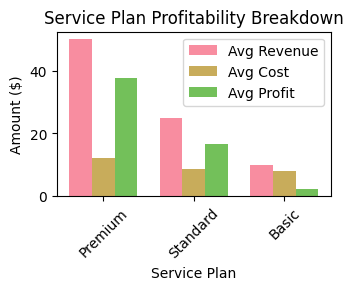

In [ ]:
# Visualization: Profitability Analysis
plt.subplot(2, 2, 4)
profitability_summary = profitability_df.groupBy("Service Plan").agg(
    avg("Monthly_Revenue").alias("Avg_Revenue"),
    avg("Monthly_Cost").alias("Avg_Cost"),
    avg("Monthly_Profit").alias("Avg_Profit"),
    sum("Monthly_Profit").alias("Total_Profit")
).orderBy(desc("Total_Profit")).toPandas()

plans = profitability_summary['Service Plan']
revenue = profitability_summary['Avg_Revenue']
cost = profitability_summary['Avg_Cost']
profit = profitability_summary['Avg_Profit']

x = np.arange(len(plans))
width = 0.25

plt.bar(x - width, revenue, width, label='Avg Revenue', alpha=0.8)
plt.bar(x, cost, width, label='Avg Cost', alpha=0.8)
plt.bar(x + width, profit, width, label='Avg Profit', alpha=0.8)

plt.xlabel('Service Plan')
plt.ylabel('Amount ($)')
plt.title('Service Plan Profitability Breakdown')
plt.xticks(x, plans)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Additional detailed visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Pokhara'),
  Text(1, 0, 'Chitwan'),
  Text(2, 0, 'Kathmandu'),
  Text(3, 0, 'Biratnagar'),
  Text(4, 0, 'Lalitpur')])

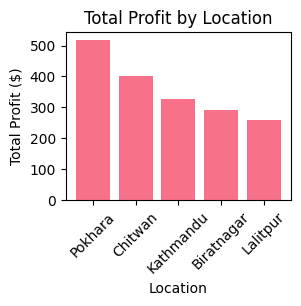

In [ ]:
# Profitability by Location
plt.subplot(2, 2, 1)
location_profitability = profitability_df.groupBy("Location").agg(
    avg("Monthly_Profit").alias("Avg_Profit"),
    sum("Monthly_Profit").alias("Total_Profit")
).orderBy(desc("Total_Profit")).toPandas()

plt.bar(location_profitability['Location'], location_profitability['Total_Profit'])
plt.title('Total Profit by Location')
plt.xlabel('Location')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Basic'), Text(1, 0, 'Premium'), Text(2, 0, 'Standard')])

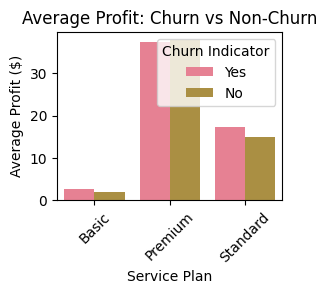

In [ ]:
# Churn Impact on Profitability
plt.subplot(2, 2, 2)
churn_profitability = profitability_df.groupBy("Churn Indicator", "Service Plan").agg(
    avg("Monthly_Profit").alias("Avg_Profit")
).toPandas()

sns.barplot(data=churn_profitability, x='Service Plan', y='Avg_Profit', hue='Churn Indicator')
plt.title('Average Profit: Churn vs Non-Churn')
plt.xlabel('Service Plan')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Feature Correlation Matrix')

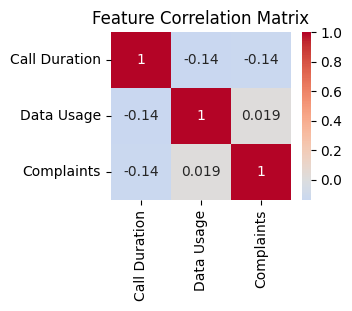

In [ ]:
# Usage Patterns Correlation
plt.subplot(2, 2, 3)
numeric_columns = ['Call Duration', 'Data Usage', 'Complaints']
correlation_matrix = df_pandas[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

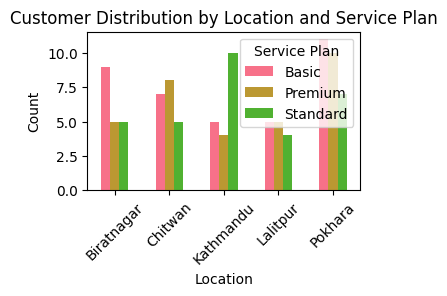

In [ ]:
# Customer Distribution by Service Plan and Location
plt.subplot(2, 2, 4)
cross_tab = pd.crosstab(df_pandas['Location'], df_pandas['Service Plan'])
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Customer Distribution by Location and Service Plan')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Service Plan')

plt.tight_layout()
plt.show()

In [ ]:
# Final Summary Visualization
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

([0, 1, 2, 3],
 [Text(0, 0, 'Total Customers'),
  Text(1, 0, 'Churn Rate'),
  Text(2, 0, 'Avg Call Duration'),
  Text(3, 0, 'Avg Data Usage')])

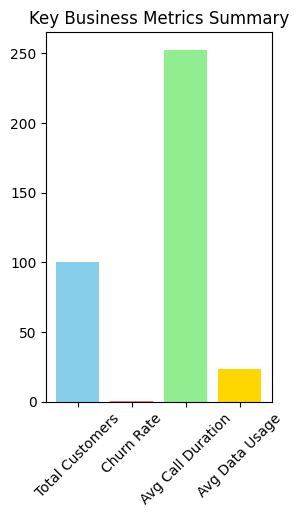

In [ ]:
# Key Metrics Summary
metrics = ['Total Customers', 'Churn Rate', 'Avg Call Duration', 'Avg Data Usage']
values = [
    df.count(),
    df.filter(col("Churn Indicator") == "Yes").count() / df.count(),
    df.select(avg("Call Duration")).collect()[0][0],
    df.select(avg("Data Usage")).collect()[0][0]
]

plt.subplot(1, 2, 1)
bars = plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Key Business Metrics Summary')
plt.xticks(rotation=45)


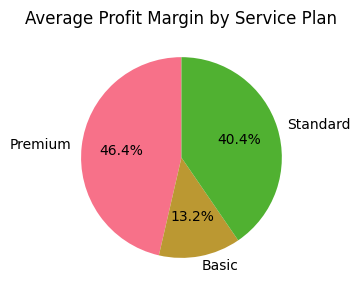


KEY INSIGHTS AND RECOMMENDATIONS


In [ ]:
# Profit Margin by Service Plan
plt.subplot(1, 2, 2)
profit_margin = profitability_df.groupBy("Service Plan").agg(
    avg("Profit_Margin").alias("Avg_Profit_Margin")
).toPandas()

plt.pie(profit_margin['Avg_Profit_Margin'], labels=profit_margin['Service Plan'],
        autopct='%1.1f%%', startangle=90)
plt.title('Average Profit Margin by Service Plan')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*50)

In [ ]:
# Print key insights
total_customers = df.count()
churned_customers = df.filter(col("Churn Indicator") == "Yes").count()
churn_rate = churned_customers / total_customers

print(f"Overall Churn Rate: {churn_rate:.2%}")
print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Logistic Regression Model AUC: {auc_lr:.4f}")

Overall Churn Rate: 48.00%
Total Customers: 100
Churned Customers: 48
Logistic Regression Model AUC: 0.6429


In [ ]:
# Most congested locations
most_congested = congestion_analysis.first()
print(f"Most congested location: {most_congested['Location']} "
      f"(Congestion Score: {most_congested['Overall_Congestion_Score']:.2%})")

Most congested location: Lalitpur (Congestion Score: 39.29%)


In [ ]:
# Stop Spark session
spark.stop()